# Projeto de analise do mercado de games

Análise das vendas de jogos de PS4

In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
#ler os dados
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding = 'Latin-1')
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
#procurar nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [ ]:
#como os valores são referentes a cada jogo, não cabe preencher esses dados, somente retirar as linhas
base_dados.dropna(inplace = True)

In [ ]:
#estatisticas gerais de base de dados
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


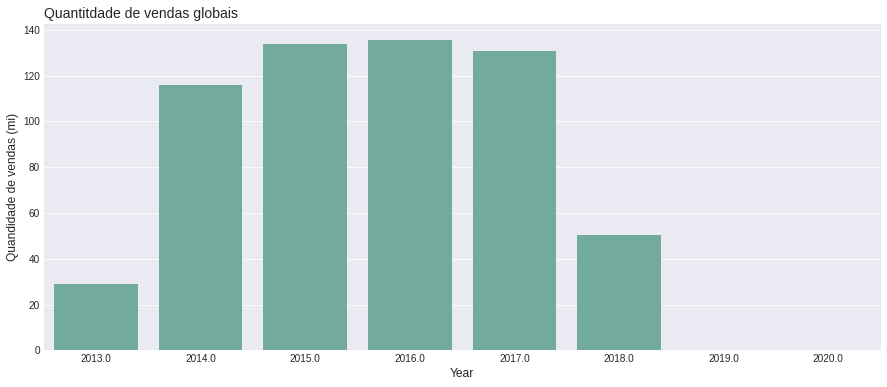

In [ ]:
#olhar vendas no globo por ano
plt.style.use('seaborn-darkgrid')

plt.figure(figsize = (15,6))
plt.title('Quantitdade de vendas globais', fontsize = 14, loc = 'left')

sns.barplot(data = base_dados, x = 'Year', y = 'Global', ci = None, color = '#69b3a2', estimator = sum)
plt.ylabel('Quandidade de vendas (mi)');

In [ ]:
#para retirar os anos que n tem dados
base_dados = base_dados.loc[(base_dados['Year'] !=2019) & (base_dados['Year'] != 2020)]

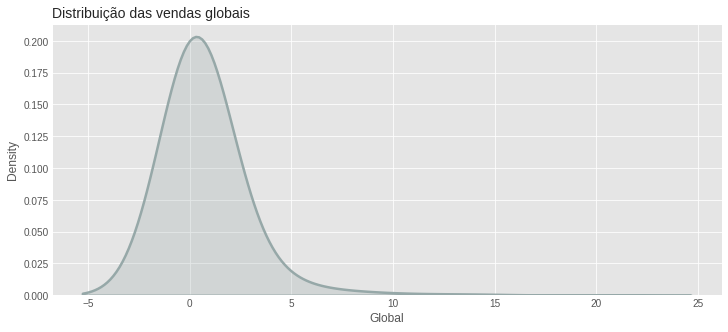

In [ ]:
plt.figure(figsize = (12,5))

#estilo do plot
plt.style.use('ggplot')
plt.title('Distribuição das vendas globais', fontsize = 14, loc = 'left')
sns.kdeplot(base_dados['Global'], shade = True, bw =1, color = '#96a8a8', linewidth = 2.5 );

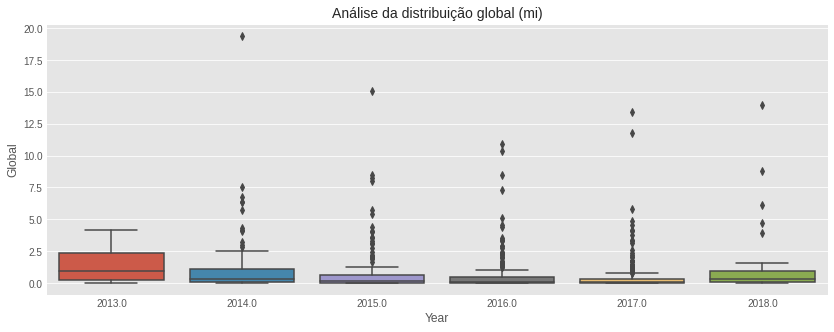

In [ ]:
#boxplot para identificar melhor os outliers
plt.figure(figsize = (14,5))

plt.title('Análise da distribuição global (mi)', fontsize = 14)
sns.boxplot(data = base_dados, x = 'Year', y = 'Global');

In [ ]:
#grafico para analisar o quanto que cada região representa nas vendas
analise = base_dados.groupby( by=['Year'] ).sum().reset_index()

North_america = [America/ Total * 100 for America, Total in zip(analise['North America'], analise['Global'])]
Europe = [Europe/ Total * 100 for Europe, Total in zip(analise['Europe'], analise['Global'])]
Japan = [Japan/ Total * 100 for Japan, Total in zip(analise['Japan'], analise['Global'])]
World = [World/ Total * 100 for World, Total in zip(analise['Rest of World'], analise['Global'])]

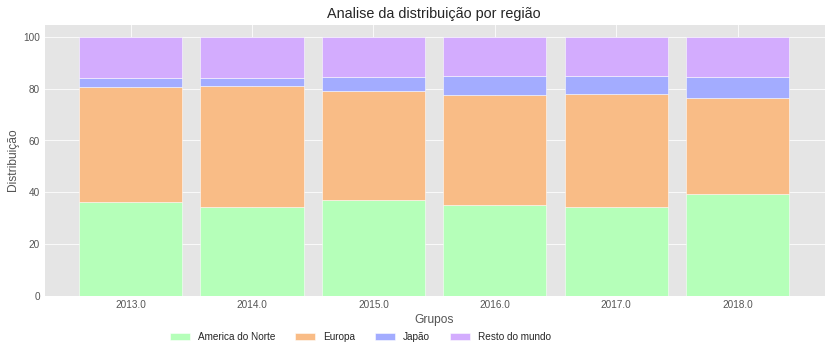

In [ ]:
#rotina para empilhar as barras no barplot
plt.figure(figsize = (14,5))
largura_barra = 0.85
rotulos = analise['Year']
Grupos = [0,1, 2, 3, 4, 5]

#plot da América do norte
plt.bar(Grupos, North_america, width = largura_barra, color = '#b5ffb9', edgecolor = 'white')

#plot Europa
plt.bar(Grupos, Europe, bottom = North_america, width = largura_barra, color = '#f9bc86', edgecolor = 'white')

#plot Japão
plt.bar(Grupos, Japan, bottom = [A + B for A,B in zip(North_america, Europe)], width = largura_barra, color = '#a3acff', edgecolor = 'white')

#plot do resto do mundo
plt.bar(Grupos, World,bottom = [A + B + C for A,B,C in zip(North_america, Europe, Japan)],  width = largura_barra, color = '#d3acfe', edgecolor = 'white')

plt.title('Analise da distribuição por região')
plt.xticks(Grupos, rotulos)
plt.xlabel('Grupos')
plt.ylabel('Distribuição')
plt.legend(['America do Norte', 'Europa', 'Japão', 'Resto do mundo'], loc = 'upper left', bbox_to_anchor = (0.15,-0.1), ncol = 4)

In [ ]:
#importar biblioteca do sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
funcao_label = LabelEncoder()

In [ ]:
base_dados['Produtor'] =  funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game'])
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre'])

In [ ]:
paleta_cores = sns.color_palette('husl',8)

In [ ]:
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

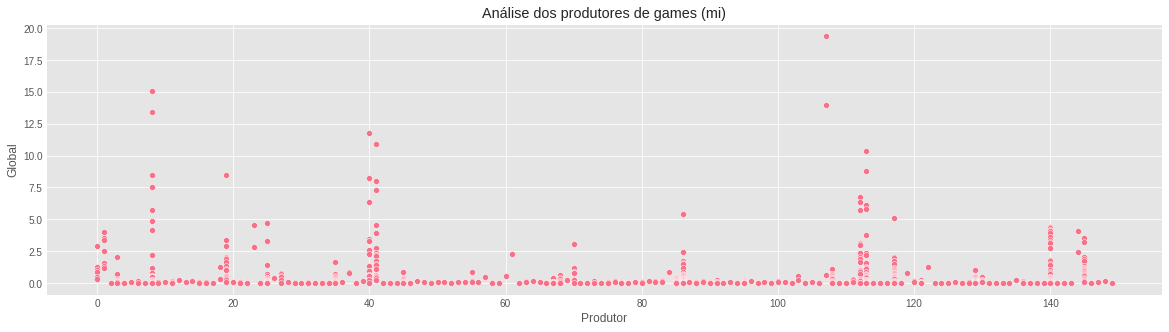

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Análise dos produtores de games (mi)')
sns.scatterplot(data = base_dados, x = 'Produtor', y = 'Global', color= paleta_cores[0]);

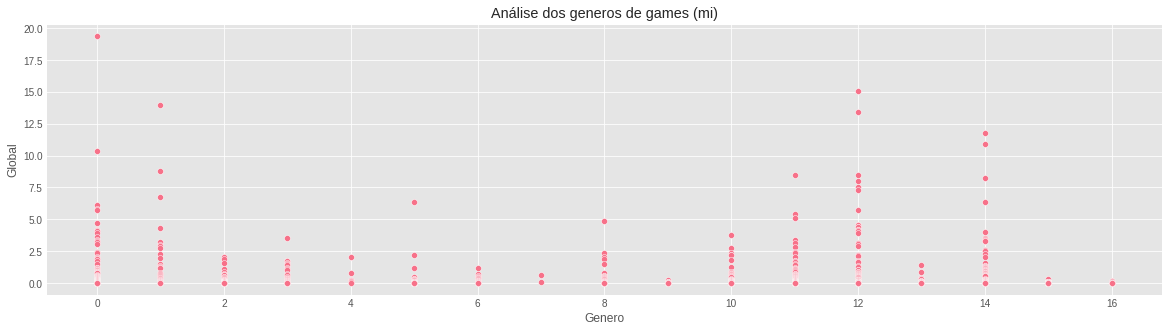

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Análise dos generos de games (mi)')
sns.scatterplot(data = base_dados, x = 'Genero', y = 'Global', color= paleta_cores[0]);

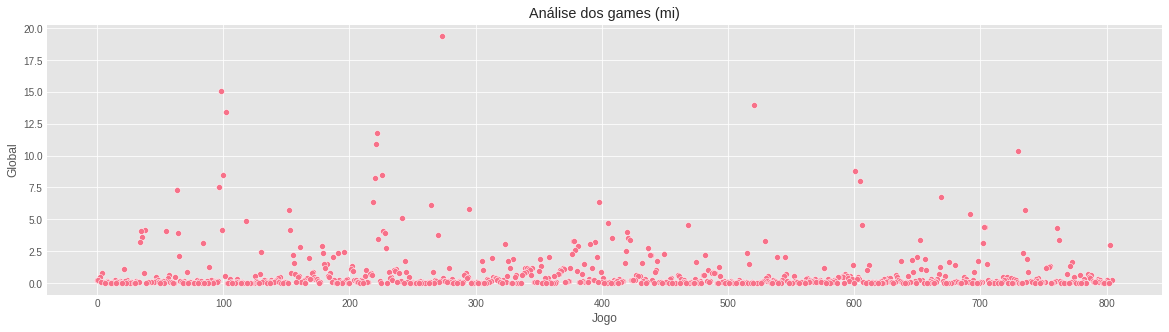

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Análise dos games (mi)')
sns.scatterplot(data = base_dados, x = 'Jogo', y = 'Global', color= paleta_cores[0]);

# Agora na forma de relatório com matplotlib

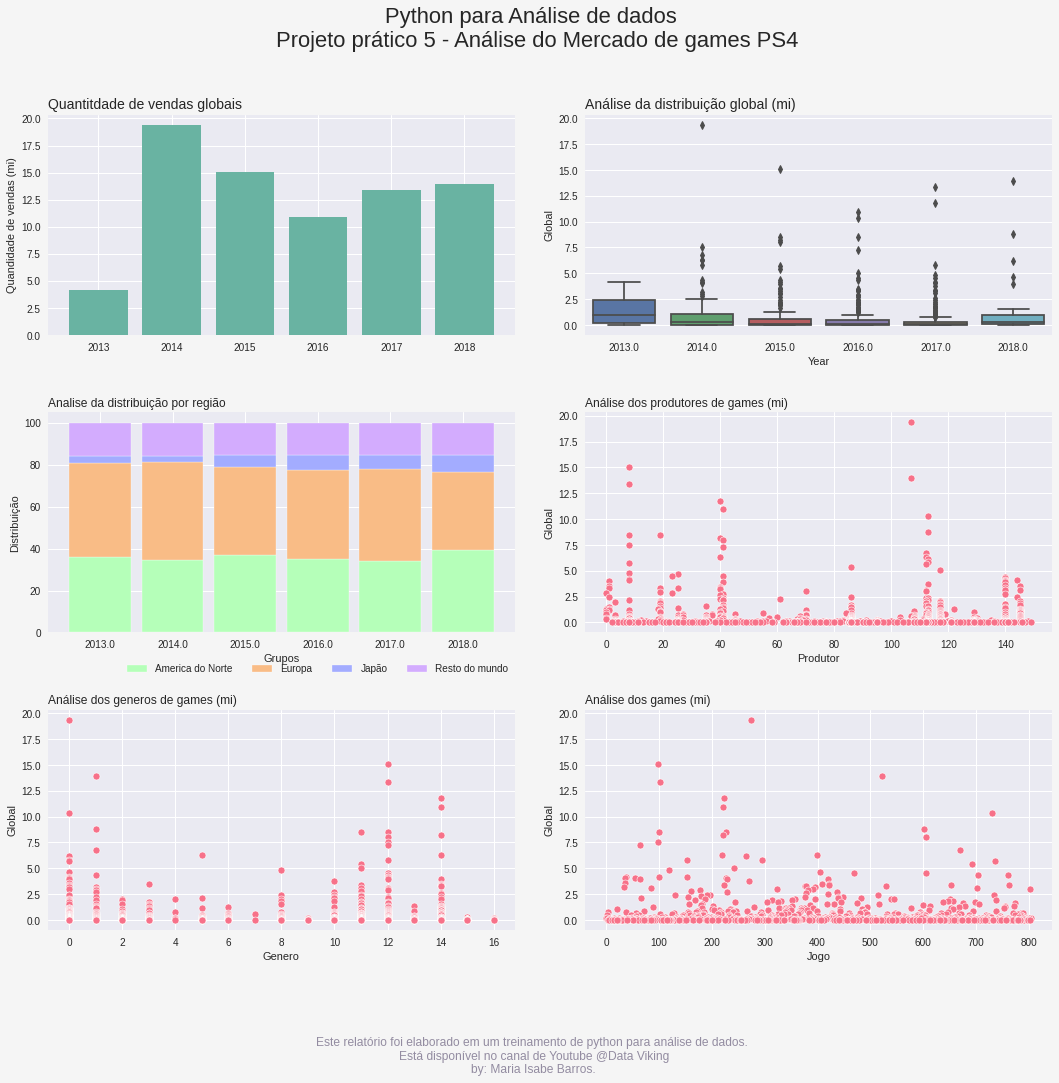

In [ ]:
fig, ax = plt.subplots(figsize = (18,15))
#parametros para o grid
linhas = 3
colunas  = 2

#cor do fundo
cor_do_fundo = '#f5f5f5'
ax.set_facecolor(cor_do_fundo) 
fig.set_facecolor(cor_do_fundo) 

#estilo dos gráficos
plt.style.use('seaborn')

#os plots
plt.suptitle('Python para Análise de dados \n Projeto prático 5 - Análise do Mercado de games PS4', fontsize = 22)
#acessando o grafico 1
plt.subplot(linhas, colunas, 1)
plt.title('Quantitdade de vendas globais', fontsize = 14, loc = 'left')
plt.bar(base_dados['Year'], base_dados['Global'], color = '#69b3a2')
plt.ylabel('Quandidade de vendas (mi)');

#acessando o grafico 2-> boxplot
plt.subplot(linhas, colunas, 2)
plt.title('Análise da distribuição global (mi)', fontsize = 14, loc= 'left')
sns.boxplot(data = base_dados, x = 'Year', y = 'Global');

#acessando o grafico 3
plt.subplot(linhas, colunas, 3)
largura_barra = 0.85
rotulos = analise['Year']
Grupos = [0,1, 2, 3, 4, 5]

plt.title('Analise da distribuição por região', loc ='left')
#plot da América do norte
plt.bar(Grupos, North_america, width = largura_barra, color = '#b5ffb9', edgecolor = 'white')
#plot Europa
plt.bar(Grupos, Europe, bottom = North_america, width = largura_barra, color = '#f9bc86', edgecolor = 'white')
#plot Japão
plt.bar(Grupos, Japan, bottom = [A + B for A,B in zip(North_america, Europe)], width = largura_barra, color = '#a3acff', edgecolor = 'white')
#plot do resto do mundo
plt.bar(Grupos, World,bottom = [A + B + C for A,B,C in zip(North_america, Europe, Japan)],  width = largura_barra, color = '#d3acfe', edgecolor = 'white')

plt.xticks(Grupos, rotulos)
plt.xlabel('Grupos')
plt.ylabel('Distribuição')
plt.legend(['America do Norte', 'Europa', 'Japão', 'Resto do mundo'], loc = 'upper left', bbox_to_anchor = (0.15,-0.1), ncol = 4)

#acessando o grafico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise dos produtores de games (mi)', loc = 'left')
sns.scatterplot(data = base_dados, x = 'Produtor', y = 'Global', color= paleta_cores[0]);

#acessando o grafico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise dos generos de games (mi)', loc = 'left')
sns.scatterplot(data = base_dados, x = 'Genero', y = 'Global', color= paleta_cores[0]);

#acessando o grafico 6
plt.subplot(linhas, colunas, 6)
plt.title('Análise dos games (mi)', loc = 'left')
sns.scatterplot(data = base_dados, x = 'Jogo', y = 'Global', color= paleta_cores[0]);
#ajustar o layout
plt.subplots_adjust(hspace = 0.35, wspace = 0.15)
#incluindo o rodapé no relatório
rodape = ''' 
Este relatório foi elaborado em um treinamento de python para análise de dados. 
Está disponível no canal de Youtube @Data Viking
by: Maria Isabe Barros.'''
fig.text(0.5,-0.01, rodape, ha = 'center', va = 'bottom', size =12, color = '#938ca1');